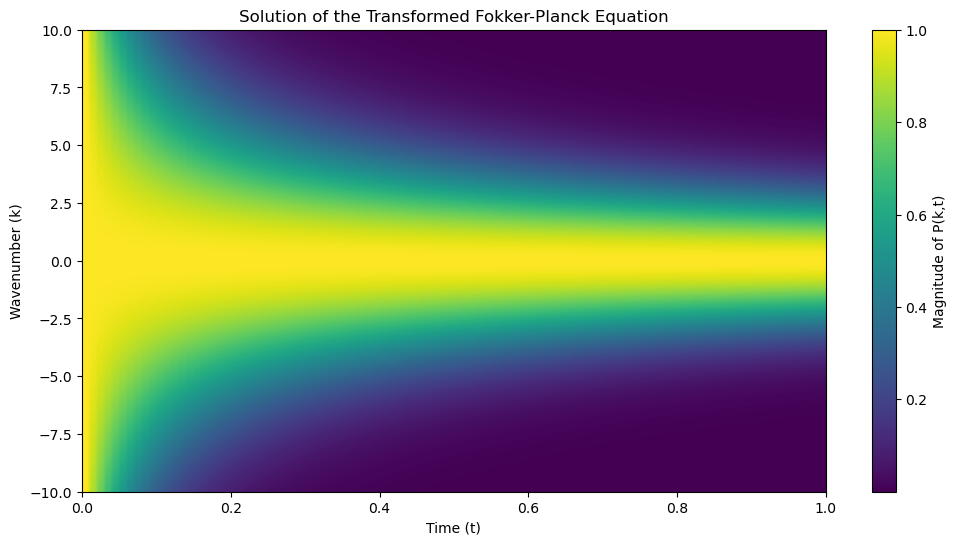

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants for the drift and diffusion terms
a = 1.0  # Drift coefficient
b = 0.5  # Diffusion coefficient

# The transformed Fokker-Planck equation in the Fourier space, split into real and imaginary parts
def transformed_fokker_planck(P, t, k, a, b):
    # P[0] is the real part, P[1] is the imaginary part
    dPdt_real = -k * a * P[1] - 0.5 * (k**2) * (b**2) * P[0]
    dPdt_imag = k * a * P[0] - 0.5 * (k**2) * (b**2) * P[1]
    return [dPdt_real, dPdt_imag]

# Initial condition: Fourier transform of a delta function (i.e., initial probability at x=0)
# Real and imaginary parts separately
P0 = [1.0, 0.0]

# Time and wavenumber vectors
t = np.linspace(0, 1, 100)
k = np.linspace(-10, 10, 400)

# Solve the equation for each wavenumber
P = np.array([odeint(transformed_fokker_planck, P0, t, args=(ki, a, b)) for ki in k])

# Combining the real and imaginary parts into a complex solution
P_complex = P[:,:,0] + 1j * P[:,:,1]

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(P_complex), extent=[t.min(), t.max(), k.min(), k.max()], aspect='auto', origin='lower')
plt.colorbar(label='Magnitude of P(k,t)')
plt.xlabel('Time (t)')
plt.ylabel('Wavenumber (k)')
plt.title('Solution of the Transformed Fokker-Planck Equation')
plt.show()


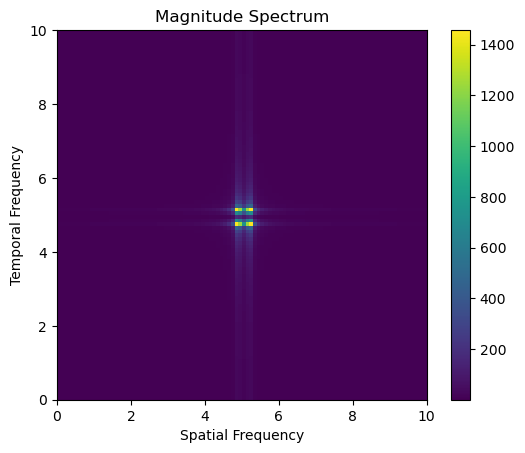

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example: generate a sample nonlinear time series data
# This is just an example. Replace this with your actual data.
x = np.linspace(0, 10, 100)
t = np.linspace(0, 10, 100)
X, T = np.meshgrid(x, t)
data = np.sin(X) * np.cos(T)  # A simple nonlinear combination

# Apply the 2D Fourier transform
F = np.fft.fft2(data)

# Shift the zero frequency component to the center
F_shifted = np.fft.fftshift(F)

# Plot the spectrum
plt.imshow(np.abs(F_shifted), extent=[np.min(x), np.max(x), np.min(t), np.max(t)])
plt.colorbar()
plt.title("Magnitude Spectrum")
plt.xlabel("Spatial Frequency")
plt.ylabel("Temporal Frequency")
plt.show()


Keep in mind that though th Fokker-Planck 